## K-Nearest Neighbors

In [3]:
try:
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    from sklearn import preprocessing
except ImportError:
    import  pip
    pip.main(["install", "--upgrade", "pip"])
    pip.main(["install", "numpy","matplotlib","pandas","numpy","scikit-learn"])
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    from sklearn import preprocessing 



In [4]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')

#return top5 rows from dataframe in normal
df.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
#check how many of each class in data
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

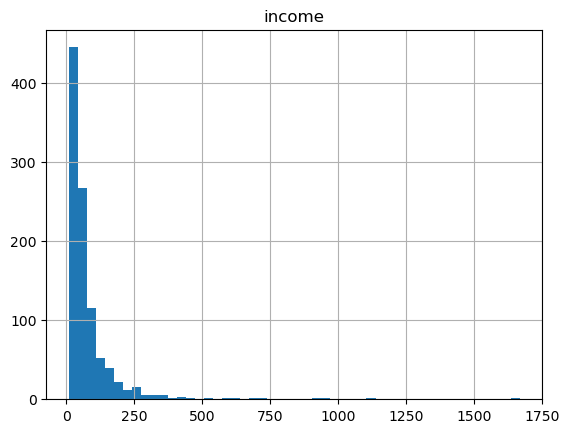

In [6]:
#explore data using histogram
df.hist(column='income', bins=50)

In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [8]:
#df.columns get the index
X = df[df.columns.to_numpy()].values
X[0:5]
print(type(X))

<class 'numpy.ndarray'>


In [9]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


In [12]:
from sklearn.neighbors import  KNeighborsClassifier

k = 4 
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [13]:
Yhat = neigh.predict(X_test)
Yhat[0:5]

array([3, 1, 1, 2, 4])

In [14]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train,neigh.predict(X_train)))
print("Test set Accurancy: ", metrics.accuracy_score(Y_test, Yhat))

Train set Accuracy:  0.82875
Test set Accurancy:  0.735


### Practice





## Decision Trees

In [15]:
import sys
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

### Downloading Data

In [16]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [17]:
df.shape

(200, 6)

In [18]:

X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [19]:
from sklearn import  preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:,1] = le_sex.transform(X[:, 1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['low'.upper(), 'normal'.upper(), 'high'.upper()])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['normal'.upper(), 'high'.upper()])

LabelEncoder()

In [20]:
X[:, 3] = le_Chol.transform(X[:,3])
X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [21]:
Y = df['Drug']
Y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [22]:
from sklearn.model_selection import  train_test_split
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)
drugTree = DecisionTreeClassifier(criterion='entropy' , max_depth=4)
drugTree.fit(X_trainset, Y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
predTree = drugTree.predict(X_testset)

In [24]:
print(predTree[0:5])
print(Y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


## Regression-Tree

In [25]:
# Pandas will allow us to create a dataframe of the data so it can be used and manipulated
# install the missing python component 
try:
    import pandas as pd
    # Regression Tree Algorithm
    from sklearn.tree import DecisionTreeRegressor
    # Split our data into a training and testing data
    from sklearn.model_selection import train_test_split
except ImportWarning or ImportError:
    import pip
    pip.main(["install", "--upgrade", "pip"])
    pip.main(["install"])

    

In [26]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/real_estate_data.csv")
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [27]:
# learn about the size of data
data.shape

(506, 13)

In [28]:
#drop the rowsing with missing values 
#sum the na values
data.dropna(inplace=True)
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [29]:
print(data.head(-1))

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
498  0.23912   0.0   9.69   0.0  0.585  6.019  65.3  2.4091    6  391   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.

In [30]:
X = data.drop(columns=["MEDV"])
Y = data["MEDV"]

In [31]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21


In [32]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

#sklearn==1.5 mse ==> squared_error
regression_Tree = DecisionTreeRegressor(criterion = "squared_error")
regression_Tree.fit(X_train, Y_train)
regression_Tree.score(X_test, Y_test)